## Import Modules

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import seaborn as sns
import re
import nltk
import string
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Twitter credentials

In [2]:
bearer= "AAAAAAAAAAAAAAAAAAAAAMf7dgEAAAAAAFHVfDRpYLnRQl0Mf%2BbiDtL5pBw%3D2ayDOXwTCqSPXqkWKwjN4SKNgwGMB4YL888WA8yFvLBCW4Vrkg"
consumer_key= "ZFPSmUTrgFgvoHst3AZMDqQKm"
consumer_secret= "gfd3qn7drA34eF17krOGM2nskgrb3dH8p5HatUzhBYKMOX6n24"
access_token= "1536759867717070848-TTwVYFy9cXCLvSfXWw6RZpXsuxRYfB"
access_token_secret= "PgSSALiYvsHZYonTtBNDcRZd4qdUzXNpODxTqL0Qqqp07"

In [3]:
api = tweepy.Client(bearer, consumer_key, consumer_secret, access_token, access_token_secret)
api.get_me()


Response(data=<User id=1536759867717070848 name=shrehal singh username=shrelicious_07>, includes={}, errors=[], meta={})

## Extracting Tweets

In [4]:
#extract 100 recent tweets
response = api.search_recent_tweets('#Health', max_results = 100)

tweets = response.data
for tweet in tweets[0:5]:
    print(tweet.text)
    print('---------------------------------')

RT @TRCcream: Take control of how you feel today. Click the link below to learn more.
https://t.co/0kmRNtYEyA 
 #health #totalhealth #posts…
---------------------------------
RT @tlysg: Austria: Stories of Promoting Falun Gong and Doing the #Exercises in a #Vienna Park (Photos) 

#FalunGong #FalunDafa #Meditation…
---------------------------------
RT @PapaSizzle_: So proud of me n Sharleans new healthy lifestyle 

#love #Health #healthfreaks #RESPAWNRecruits #twitchtv https://t.co/rWz…
---------------------------------
Check out these Go!Bots! 😃 Go!Bots are parcels of land in Health Hero City. Become a Health Hero City land owner today! 🎉 https://t.co/YLIMniqKvZ #nft #wellbeing #wellness #health #fitness #virtualland #gobyhealthhero
---------------------------------
RT @IshaEurope: Is it possible to evaluate spiritual growth? Sadhguru offers guidance - https://t.co/t8SGrMCu3K 

#Sadhguru #Life #Wisdom…
---------------------------------


In [5]:
df = pd.DataFrame([tweet.text for tweet in tweets], columns = ['Posts'])
df.head(5)

,Posts
0,RT @TRCcream: Take control of how you feel tod...
1,RT @tlysg: Austria: Stories of Promoting Falun...
2,RT @PapaSizzle_: So proud of me n Sharleans ne...
3,Check out these Go!Bots! 😃 Go!Bots are parcels...
4,RT @IshaEurope: Is it possible to evaluate spi...


## Data Preproccesesing

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub("@[\w]*", "", text)
    text = re.sub("http\S+", "", text)
    text = re.sub("[^a-zA-Z#]", " ", text)
    text = re.sub("rt", "", text)
    text = re.sub("\s+", " ", text)

    return text

In [7]:
df['Clean_Posts'] = df['Posts'].apply(preprocess_text)
df

,Posts,Clean_Posts
0,RT @TRCcream: Take control of how you feel tod...,take control of how you feel today click the ...
1,RT @tlysg: Austria: Stories of Promoting Falun...,austria stories of promoting falun gong and d...
2,RT @PapaSizzle_: So proud of me n Sharleans ne...,so proud of me n sharleans new healthy lifest...
3,Check out these Go!Bots! 😃 Go!Bots are parcels...,check out these go bots go bots are parcels of...
4,RT @IshaEurope: Is it possible to evaluate spi...,is it possible to evaluate spiritual growth s...
...,...,...
95,RT @VitalityOnline: Yikes.\n#Covid_19 #Health ...,yikes #covid #health #vaccineinjuries
96,Plaque removal from arteries: Best 5 Possibili...,plaque removal from aeries best possibilities ...
97,Calling all SMEs! The Being Well Together Prog...,calling all smes the being well together progr...
98,RT @the_jandashow: Another one by @Artie_janda...,another one by from last night #food #greekfo...


In [8]:
# individual words considered as tokens
tokenized_tweet = df['Clean_Posts'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [take, control, of, how, you, feel, today, cli...
1    [austria, stories, of, promoting, falun, gong,...
2    [so, proud, of, me, n, sharleans, new, healthy...
3    [check, out, these, go, bots, go, bots, are, p...
4    [is, it, possible, to, evaluate, spiritual, gr...
Name: Clean_Posts, dtype: object

In [9]:
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [take, control, of, how, you, feel, today, cli...
1    [austria, stori, of, promot, falun, gong, and,...
2    [so, proud, of, me, n, sharlean, new, healthi,...
3    [check, out, these, go, bot, go, bot, are, par...
4    [is, it, possibl, to, evalu, spiritu, growth, ...
Name: Clean_Posts, dtype: object

In [10]:
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['Clean_Posts'] = tokenized_tweet
df.head()

,Posts,Clean_Posts
0,RT @TRCcream: Take control of how you feel tod...,take control of how you feel today click the l...
1,RT @tlysg: Austria: Stories of Promoting Falun...,austria stori of promot falun gong and do the ...
2,RT @PapaSizzle_: So proud of me n Sharleans ne...,so proud of me n sharlean new healthi lifestyl...
3,Check out these Go!Bots! 😃 Go!Bots are parcels...,check out these go bot go bot are parcel of la...
4,RT @IshaEurope: Is it possible to evaluate spi...,is it possibl to evalu spiritu growth sadhguru...


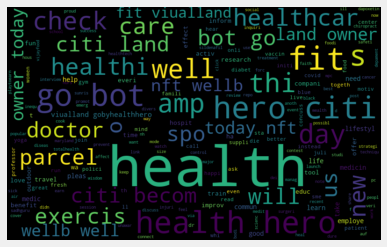

In [11]:
# visualize the frequent words
allWords = ' '.join([twts for twts in df['Clean_Posts']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Clean_Posts'].apply(getSubjectivity)
df['Polarity'] = df['Clean_Posts'].apply(getPolarity)
df

,Posts,Clean_Posts,Subjectivity,Polarity
0,RT @TRCcream: Take control of how you feel tod...,take control of how you feel today click the l...,0.500000,0.500000
1,RT @tlysg: Austria: Stories of Promoting Falun...,austria stori of promot falun gong and do the ...,0.000000,0.000000
2,RT @PapaSizzle_: So proud of me n Sharleans ne...,so proud of me n sharlean new healthi lifestyl...,0.684848,0.478788
3,Check out these Go!Bots! 😃 Go!Bots are parcels...,check out these go bot go bot are parcel of la...,0.400000,0.400000
4,RT @IshaEurope: Is it possible to evaluate spi...,is it possibl to evalu spiritu growth sadhguru...,0.000000,0.000000
...,...,...,...,...
95,RT @VitalityOnline: Yikes.\n#Covid_19 #Health ...,yike #covid #health #vaccineinjuri,0.000000,0.000000
96,Plaque removal from arteries: Best 5 Possibili...,plaqu remov from aeri best possibl hospit care...,0.300000,1.000000
97,Calling all SMEs! The Being Well Together Prog...,call all sme the be well togeth programm provi...,0.000000,0.300000
98,RT @the_jandashow: Another one by @Artie_janda...,anoth one by from last night #food #greekfood ...,0.066667,0.000000


## Exploratory Analysis

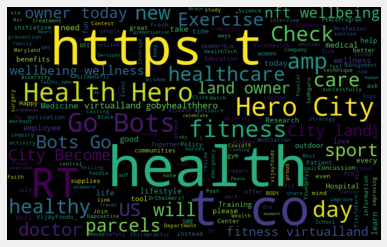

In [13]:
allWords = ' '.join([twts for twts in df['Posts']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [14]:
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Nuetral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Posts,Clean_Posts,Subjectivity,Polarity,Analysis
0,RT @TRCcream: Take control of how you feel tod...,take control of how you feel today click the l...,0.500000,0.500000,Positive
1,RT @tlysg: Austria: Stories of Promoting Falun...,austria stori of promot falun gong and do the ...,0.000000,0.000000,Nuetral
2,RT @PapaSizzle_: So proud of me n Sharleans ne...,so proud of me n sharlean new healthi lifestyl...,0.684848,0.478788,Positive
3,Check out these Go!Bots! 😃 Go!Bots are parcels...,check out these go bot go bot are parcel of la...,0.400000,0.400000,Positive
4,RT @IshaEurope: Is it possible to evaluate spi...,is it possibl to evalu spiritu growth sadhguru...,0.000000,0.000000,Nuetral
...,...,...,...,...,...
95,RT @VitalityOnline: Yikes.\n#Covid_19 #Health ...,yike #covid #health #vaccineinjuri,0.000000,0.000000,Nuetral
96,Plaque removal from arteries: Best 5 Possibili...,plaqu remov from aeri best possibl hospit care...,0.300000,1.000000,Positive
97,Calling all SMEs! The Being Well Together Prog...,call all sme the be well togeth programm provi...,0.000000,0.300000,Positive
98,RT @the_jandashow: Another one by @Artie_janda...,anoth one by from last night #food #greekfood ...,0.066667,0.000000,Nuetral


In [15]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [16]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['Clean_Posts'][df['Analysis']=='Positive'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Clean_Posts'][df['Analysis']=='Negative'])

In [17]:
ht_positive[:5]

[['health', 'totalhealth', 'post'],
 ['love', 'health', 'healthfreak', 'respawnrecruit', 'twitchtv'],
 ['nft', 'wellb', 'well', 'health', 'fit', 'viualland', 'gobyhealthhero'],
 ['health', 'climatechang'],
 ['health',
  'totalhealth',
  'postsurgeri',
  'totalcar',
  'tmjdisord',
  'dental',
  'cbd',
  'painrelief',
  'dentalhygienist',
  'cbdwell',
  'dentist',
  'dentistapprov']]

In [18]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [19]:
ht_positive[:5]

['health', 'totalhealth', 'post', 'love', 'health']

In [20]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,health,46
1,totalhealth,2
2,post,1
3,love,3
4,healthfreak,2


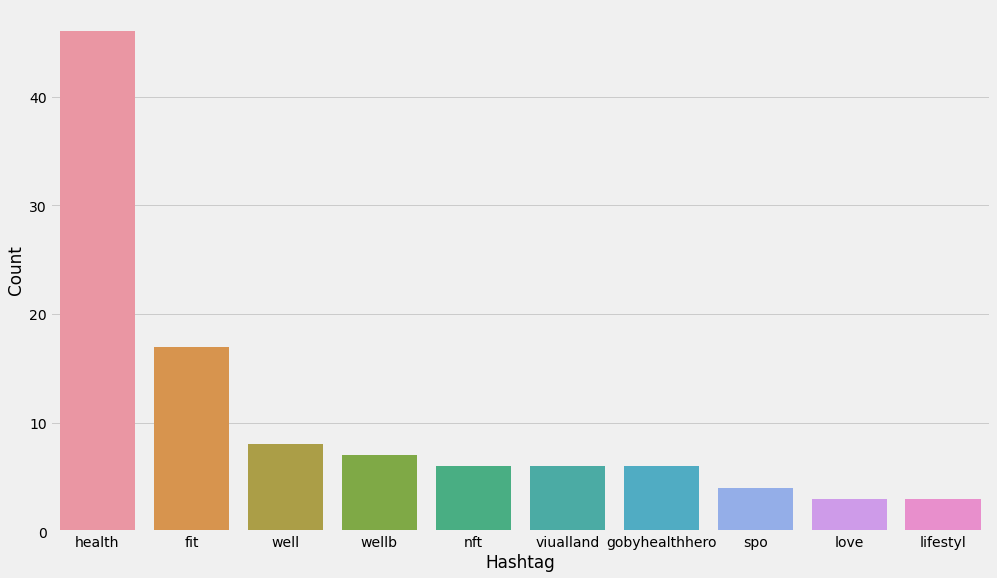

In [21]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [22]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,digitalhealth,1
1,health,5
2,medtech,1
3,futuremedicin,1
4,tomorrow,1


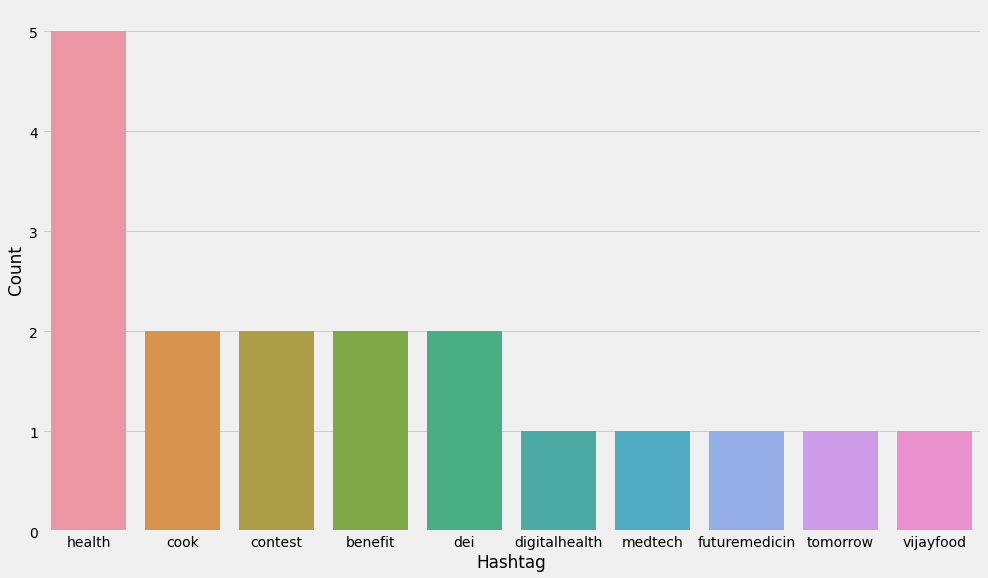

In [23]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [24]:
# print positive tweets
j = 1
sortedDf = df.sort_values(by = ['Polarity'])
for i in range(0, sortedDf.shape[0]):
    if(sortedDf['Analysis'][i] == 'Positive'):
        print(str(j) + ') '+ sortedDf['Clean_Posts'][i])
        print()
        j=j+1



1) take control of how you feel today click the link below to learn more #health #totalhealth #post

2) so proud of me n sharlean new healthi lifestyl #love #health #healthfreak #respawnrecruit #twitchtv

3) check out these go bot go bot are parcel of land in health hero citi becom a health hero citi land owner today #nft #wellb #well #health #fit #viualland #gobyhealthhero

4) watch thi space later in the year for our first indic repo track progress on #health and #climatechang in euro

5) take control of how you feel today click the link below to learn more #health #totalhealth #postsurgeri #totalcar #tmjdisord #dental #cbd #painrelief #dentalhygienist #cbdwell #dentist #dentistapprov

6) call all sme the be well togeth programm provid you with tool to effect sta and success implem

7) an intern #health group is fund a new #vaccin to cover a broad rang of #coronavirus use #exosom tini natu

8) a great interview on thi week s podcast it may interest you to know dr t colin campbel on y

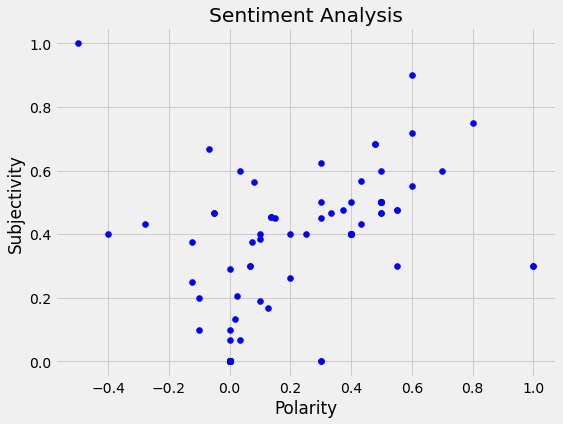

In [25]:
#plot polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i],color='Blue')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

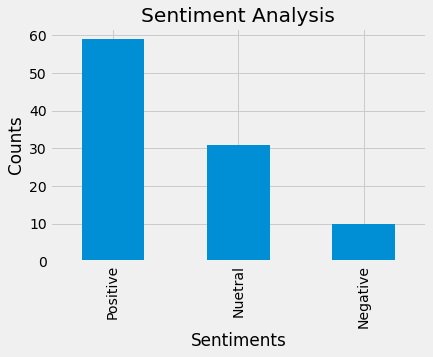

In [26]:
# show value counts
df['Analysis'].value_counts()

plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()